# Prepare and Load data

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [50]:
df1 = pd.read_excel("online_retail_II.xlsx", sheet_name=0)
df2 = pd.read_excel("online_retail_II.xlsx", sheet_name=1)
combined_df = pd.concat(objs=[df1, df2])

In [51]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [52]:
combined_df.duplicated().value_counts()

False    1033036
True       34335
Name: count, dtype: int64

In [53]:
df = combined_df.drop_duplicates()
df.duplicated().value_counts()

False    1033036
Name: count, dtype: int64

The dataframe is clear of duplicates.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 70.9+ MB


The types of nearly all features make sense. Notice that "customer ID" column contains a significant number of null values.

# Exploratory Data Analysis

#### Description of data provided
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 

- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal. The name of the country where a customer resides.

In [55]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [56]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.033036e+06,1033036,1.033036e+06,797885.000000
mean,1.007688e+01,2011-01-03 14:30:35.429549824,4.613980e+00,15313.062777
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-05 11:38:00,1.250000e+00,13964.000000
50%,3.000000e+00,2010-12-09 13:34:00,2.100000e+00,15228.000000
75%,1.000000e+01,2011-07-27 13:17:00,4.150000e+00,16788.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.751976e+02,NaN,1.223975e+02,1696.466663


In [57]:
df.describe(include=['O'])

,Invoice,StockCode,Description,Country
count,1033036,1033036,1028761,1033036
unique,53628,5305,5698,43
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,5653,5740,948321


In [58]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [59]:
df[df["Description"].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


There are orders with negative quantity (this is suspicious).

In [60]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [61]:
len(df[df["Quantity"]<0])*100/len(df)

2.1776588618402455

I noticed that negative quantity is associated with cancelled orders (invoice starts with C). My hypothesis is that there is a corresponding order with positive quantity for the same products so new entries of invoice will cancel out the order placed. \
**Hypothesis: There are 2 entries for cancelled orders.**

In [62]:
# Make a copy of the original DataFrame
df_copy = df.copy()

# Create absolute quantity column
df_copy['AbsQuantity'] = df_copy['Quantity'].abs()

# Separate cancelled and normal orders
cancelled = df_copy[df_copy['Invoice'].astype(str).str.startswith('C')].copy()
normal = df_copy[~df_copy['Invoice'].astype(str).str.startswith('C')].copy()

# Merge on Description, AbsQuantity, Price, Customer ID
merged = cancelled.merge(
    normal,
    on=['Description', 'AbsQuantity', 'Price', 'Customer ID'],
    suffixes=('_cancel', '_normal')
)

# Count matches
matched_cancelled_invoices = merged['Invoice_cancel'].nunique()
total_cancelled_invoices = cancelled['Invoice'].nunique()
print(f"Matched cancelled invoices: {matched_cancelled_invoices}/{total_cancelled_invoices}")
print(f"Percentage of matched cancelled invoices: {round(matched_cancelled_invoices*100/total_cancelled_invoices, 3)}%")

Matched cancelled invoices: 3421/8292
Percentage of matched cancelled invoices: 41.257%


Only around 41% of the cancelled order have corresponding order made beforehand. So my hypothesis above is not quite valid. This means that in for the cancelled orders' invoice, there exists:
- Matched orders
- Other non-related cancellations\
=> To be rigorous, when cleaning data, the orders that match with the cancelled invoice will also be deleted from df.

In [63]:
# See the orders that did not match the common practice invoice 
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

/var/folders/j8/0zrk86k107vfk5p8q9m8j6g40000gn/T/ipykernel_45201/2852859103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Invoice"] = df["Invoice"].astype("str")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [64]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [65]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


The invoices that started with A are used to adjust bad debt. These are not customer transactions. -> should exclude from the dataset when cleaning.

The StockCodes that are the same as description (5 digits) or 5 digits with a character at the end seem legit. So I will check those that are not. The following lines of codes are from trentpark8800 (github: https://github.com/trentpark8800).

In [66]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

/var/folders/j8/0zrk86k107vfk5p8q9m8j6g40000gn/T/ipykernel_45201/3896851610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["StockCode"] = df["StockCode"].astype("str")


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

Upon examining the above StockCodes, the below table is my findings:
https://docs.google.com/document/d/1B2So8y1cB7ReKzMzP3KsUiQ5GiOjfWRuswoH9LddFFs/edit?usp=sharing

Not all of these StockCodes relate to a product but a lot of them are fees, bank charges, adjustments, very minor products that are not associated with any customerID. So I will include only those that make sense to me (they are real products and associated with a customer ID). The codes are as follows:
- POST
- PADS
- SP1002


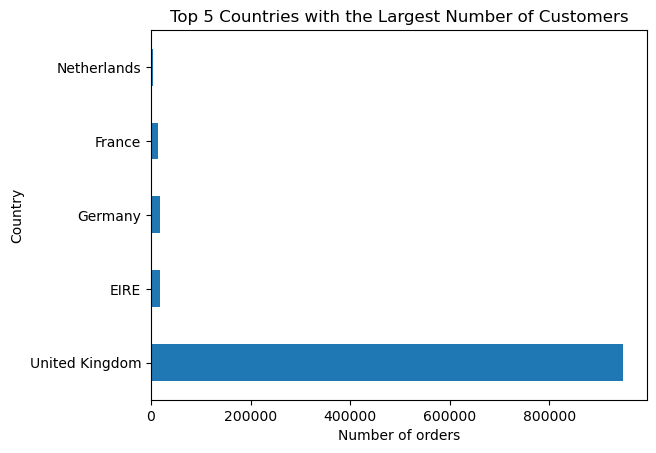

In [67]:
df["Country"].value_counts(ascending=False).head(5).plot(kind="barh")
plt.xlabel("Number of orders")
plt.ylabel("Country")
plt.title("Top 5 Countries with the Largest Number of Customers");

After EDA, Data Cleaning should focus on addressing:
- Null values for customer ID
- Negative order quantity
- Invalid invoice number
- Invalid Stock Codes
- Orders that match cancelled ones

# Data Cleaning

In [68]:
cleaned_df = df.copy()

In [69]:
# Ensure Invoice is string
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype(str)

# Keep only valid invoices (exactly 6 digits)
mask_invoice = cleaned_df["Invoice"].str.match(r"^\d{6}$")

# Remove invoices that matched normal orders linked to cancellations
mask_cancel = ~cleaned_df["Invoice"].isin(merged["Invoice_normal"].astype(str).unique())

# Keep only valid stock codes
mask_codes = (
    cleaned_df["StockCode"].str.match(r"^\d{5}$") |
    cleaned_df["StockCode"].str.match(r"^\d{5}[a-zA-Z]+$") |
    cleaned_df["StockCode"].str.match(r"^(POST|PADS|SP1002)$")
)

# Apply all filters
cleaned_df = cleaned_df[mask_invoice & mask_codes & mask_cancel]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [70]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750211 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      750211 non-null  object        
 1   StockCode    750211 non-null  object        
 2   Description  745991 non-null  object        
 3   Quantity     750211 non-null  int64         
 4   InvoiceDate  750211 non-null  datetime64[ns]
 5   Price        750211 non-null  float64       
 6   Customer ID  614481 non-null  float64       
 7   Country      750211 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 51.5+ MB


In [71]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,750211.000000,750211,750211.000000,614481.000000
mean,11.054031,2011-01-10 12:16:54.093021440,3.270167,15327.134745
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-08 14:18:00,1.250000,13927.000000
50%,4.000000,2010-12-16 13:33:00,2.080000,15311.000000
75%,12.000000,2011-08-15 12:07:00,4.130000,16809.000000
max,12960.000000,2011-12-09 12:50:00,1157.150000,18287.000000
std,88.410511,NaN,5.259200,1695.302212


In [72]:
cleaned_df = cleaned_df[cleaned_df["Price"]>0.0]

In [73]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

/var/folders/j8/0zrk86k107vfk5p8q9m8j6g40000gn/T/ipykernel_45201/1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [74]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614432 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      614432 non-null  object        
 1   StockCode    614432 non-null  object        
 2   Description  614432 non-null  object        
 3   Quantity     614432 non-null  int64         
 4   InvoiceDate  614432 non-null  datetime64[ns]
 5   Price        614432 non-null  float64       
 6   Customer ID  614432 non-null  float64       
 7   Country      614432 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 42.2+ MB


In [75]:
print(f"Dropped {round((1-len(cleaned_df)/len(df))*100,2)}% of observations during cleaning.")

Dropped 40.52% of observations during cleaning.


# Feature Engineering

In [76]:
cleaned_df["Sales"] = cleaned_df["Quantity"]*cleaned_df["Price"]
cleaned_df.head()

/var/folders/j8/0zrk86k107vfk5p8q9m8j6g40000gn/T/ipykernel_45201/3775126129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Sales"] = cleaned_df["Quantity"]*cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [77]:
aggregated_df = (
    cleaned_df.groupby(by="Customer ID", as_index=False).agg(
        Monetary=("Sales", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )
)

aggregated_df.head()

,Customer ID,Monetary,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,4921.53,8,2011-12-07 15:52:00
2,12348.0,2019.40,5,2011-09-25 13:13:00
3,12349.0,4428.69,4,2011-11-21 09:51:00
4,12350.0,334.40,1,2011-02-02 16:01:00


In [78]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,528
1,12347.0,4921.53,8,2011-12-07 15:52:00,1
2,12348.0,2019.40,5,2011-09-25 13:13:00,74
3,12349.0,4428.69,4,2011-11-21 09:51:00,18
4,12350.0,334.40,1,2011-02-02 16:01:00,309


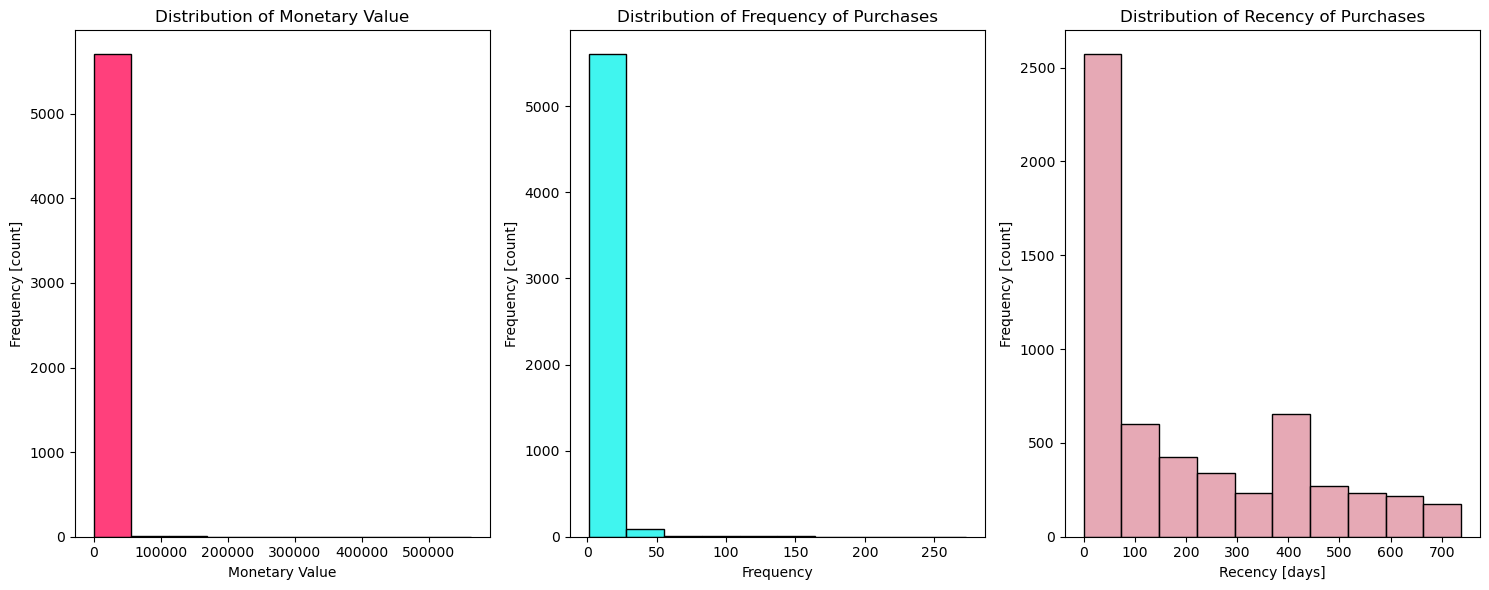

In [79]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.histplot(data=aggregated_df, x="Monetary", bins=10, color="#ff0050")
plt.xlabel("Monetary Value")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Monetary Value")

plt.subplot(1,3,2)
sns.histplot(data=aggregated_df, x="Frequency", bins=10, color="#00f2ea")
plt.xlabel("Frequency")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Frequency of Purchases")

plt.subplot(1,3,3)
sns.histplot(data=aggregated_df, x="Recency", bins=10, color="#de8c9d")
plt.xlabel("Recency [days]")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Recency of Purchases")

plt.tight_layout()
plt.show()


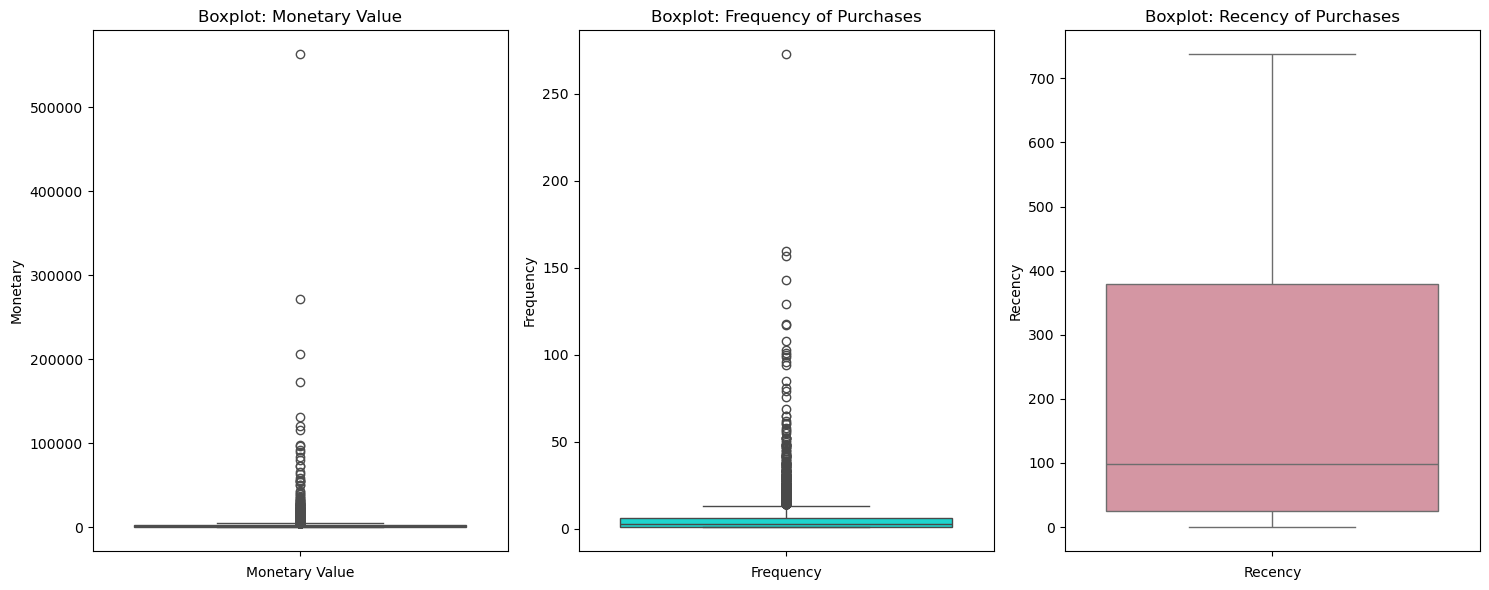

In [80]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["Monetary"], orient="v", color="#ff0050")
plt.xlabel("Monetary Value")
plt.title("Boxplot: Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["Frequency"], orient="v", color="#00f2ea")
plt.xlabel("Frequency")
plt.title("Boxplot: Frequency of Purchases")

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df["Recency"], orient="v", color="#de8c9d")
plt.xlabel("Recency")
plt.title("Boxplot: Recency of Purchases")

plt.tight_layout()
plt.show()

Monetary Value and Frequency have significantly large outliers. These outliers represent the most valuable customers (hence should not be exempt from analysis). Yet for the model to work, these outliers should be separated from the remaining values.

In [81]:
M_Q1 = aggregated_df["Monetary"].quantile(0.25)
M_Q3 = aggregated_df["Monetary"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

M_lower_bound = M_Q1 - 1.5*M_IQR
M_upper_bound = M_Q3 + 1.5*M_IQR

monetary_outliers_df = aggregated_df[(aggregated_df["Monetary"] > M_upper_bound) | (aggregated_df["Monetary"] < M_lower_bound)].copy()

monetary_outliers_df.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,578.000000,578.000000,578.000000,578,578.000000
mean,15106.160900,14082.888246,21.648789,2011-10-16 20:51:04.256055552,53.171280
min,12347.000000,4428.690000,1.000000,2010-01-17 11:33:00,0.000000
25%,13562.500000,5567.637500,11.000000,2011-10-18 13:38:30,5.250000
50%,14992.000000,7486.585000,16.000000,2011-11-21 14:01:00,17.000000
75%,16700.750000,11935.627500,24.750000,2011-12-04 00:10:45,51.000000
max,18260.000000,563214.440000,273.000000,2011-12-09 12:49:00,691.000000
std,1783.435165,31077.077666,22.081451,NaN,103.334342


In [82]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

F_lower_bound = F_Q1 - 1.5*F_IQR
F_upper_bound = F_Q3 + 1.5*F_IQR

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > F_upper_bound) | (aggregated_df["Frequency"] < F_lower_bound)].copy()

frequency_outliers_df.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,444.000000,444.000000,444.000000,444,444.000000
mean,15434.211712,15363.226225,27.394144,2011-11-03 06:25:47.837837824,35.795045
min,12395.000000,167.420000,14.000000,2010-05-12 16:51:00,0.000000
25%,13991.000000,4873.305000,16.000000,2011-11-09 15:05:00,3.000000
50%,15518.000000,7575.815000,20.000000,2011-11-28 14:37:30,10.000000
75%,16920.000000,13107.737500,29.000000,2011-12-06 09:39:00,29.000000
max,18283.000000,563214.440000,273.000000,2011-12-09 12:49:00,575.000000
std,1723.763393,35331.348275,23.106683,NaN,76.295794


In [83]:
non_outlier_df = (
    aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) 
                  & (~aggregated_df.index.isin(frequency_outliers_df.index))]
)
non_outlier_df.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,5049.000000,5049.000000,5049.000000,5049,5049.000000
mean,15342.014854,992.845395,3.373737,2011-05-01 11:35:36.458704896,221.525253
min,12346.000000,2.900000,1.000000,2009-12-01 09:55:00,0.000000
25%,13867.000000,296.360000,1.000000,2010-11-10 12:46:00,34.000000
50%,15355.000000,640.450000,2.000000,2011-07-21 17:26:00,140.000000
75%,16815.000000,1382.740000,5.000000,2011-11-04 14:07:00,394.000000
max,18287.000000,4418.380000,13.000000,2011-12-09 12:50:00,738.000000
std,1702.521296,959.374846,2.776463,NaN,211.780640


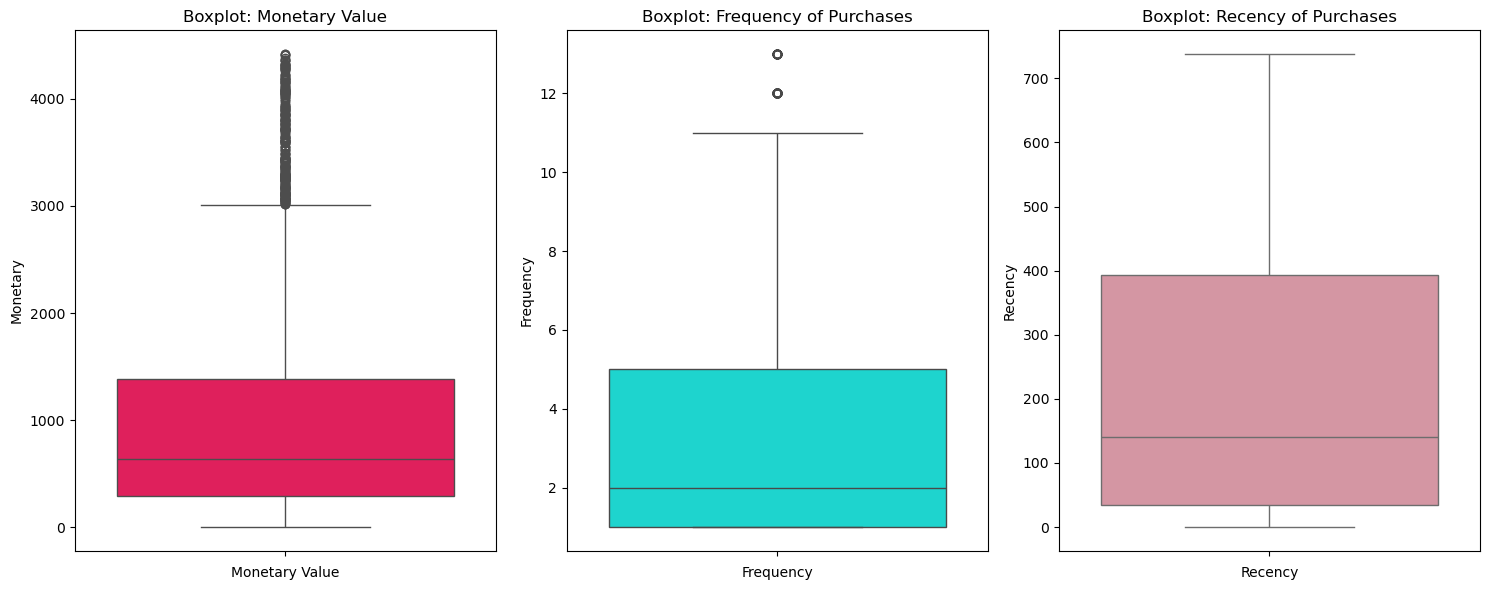

In [84]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(data=non_outlier_df["Monetary"], orient="v", color="#ff0050")
plt.xlabel("Monetary Value")
plt.title("Boxplot: Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data=non_outlier_df["Frequency"], orient="v", color="#00f2ea")
plt.xlabel("Frequency")
plt.title("Boxplot: Frequency of Purchases")

plt.subplot(1,3,3)
sns.boxplot(data=non_outlier_df["Recency"], orient="v", color="#de8c9d")
plt.xlabel("Recency")
plt.title("Boxplot: Recency of Purchases")

plt.tight_layout()
plt.show()

Even though outliers still exist for Monetary Value and Frequency, but they are much tolerable and can be accepted.

### NON-OUTLIER ANALYSIS

In [85]:
# Scale the data for clustering model 
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outlier_df[["Monetary", "Frequency", "Recency"]])
scaled_data

array([[-0.85844126, -0.49482862,  1.44727631],
       [ 1.0701305 ,  0.58578977, -0.69666361],
       [-0.68639553, -0.85503476,  0.41308503],
       ...,
       [-0.64198722, -0.85503476,  2.07062447],
       [ 0.26434894, -0.49482862,  1.20171491],
       [ 3.27343961,  1.30620203, -0.84777831]], shape=(5049, 3))

In [86]:
df_scaled = pd.DataFrame(scaled_data, index=non_outlier_df.index, columns =["Monetary", "Frequency", "Recency"])
df_scaled

,Monetary,Frequency,Recency
0,-0.858441,-0.494829,1.447276
2,1.070130,0.585790,-0.696664
4,-0.686396,-0.855035,0.413085
5,-0.721286,-0.855035,0.720037
6,0.616801,0.945996,-0.880835
...,...,...,...
5712,-0.849382,-0.494829,-1.013060
5714,-0.605835,-0.855035,0.989210
5715,-0.641987,-0.855035,2.070624
5716,0.264349,-0.494829,1.201715


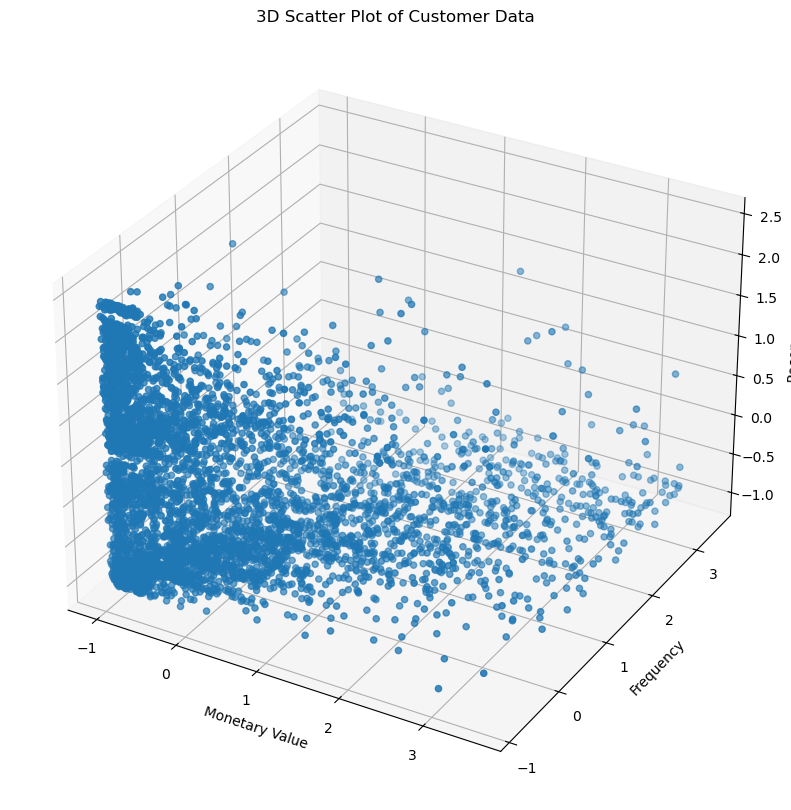

In [87]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(df_scaled["Monetary"], df_scaled["Frequency"], df_scaled["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [88]:
max_group = 11
inertias = []
sil_scores = []

for k in range(2, max_group+1):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=500)
    sil = silhouette_score(df_scaled, kmeans.fit_predict(df_scaled))
    sil_scores.append(sil)
    inertias.append(kmeans.inertia_)

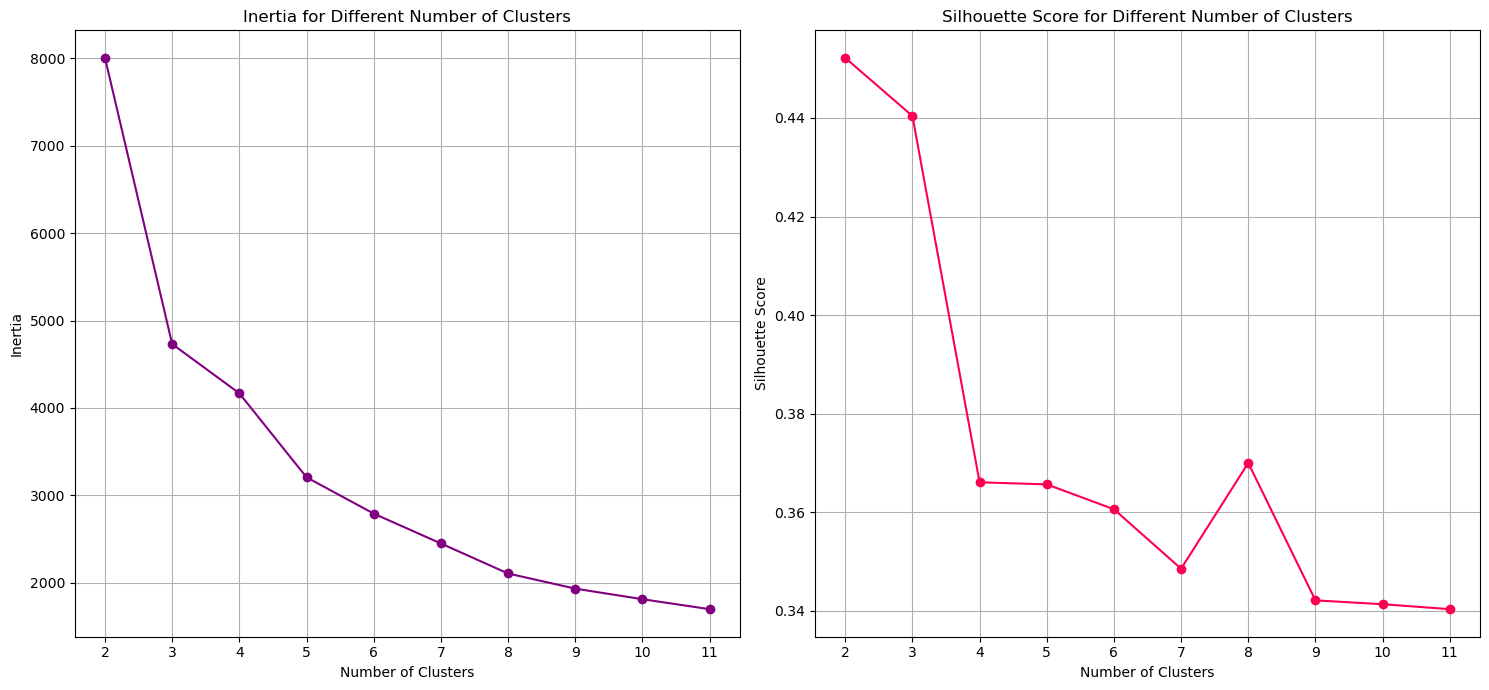

In [101]:
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
plt.plot(range(2, max_group+1), inertias, marker = 'o', color="purple")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia for Different Number of Clusters")
plt.xticks(range(2, max_group+1))
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(2, max_group+1), sil_scores, marker = 'o', color="#ff0050")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.xticks(range(2, max_group+1))
plt.grid(True)

plt.tight_layout()
plt.show()

In [96]:
sil_scores[5] < sil_scores[6]

np.True_

According to the Elbow method, k=5 seems to be the best number of clusters  as there is a significant reduction in inertia going from k=4 to k=5. When looking at the silhouette chart, the silhouette score for k=5 is slightly higher than that of k=4. So the optimal number of clusters would be 5.

In [102]:
kmeans = KMeans(n_clusters=5, random_state=42, max_iter=500)
cluster_labels = kmeans.fit_predict(df_scaled)
cluster_labels

array([1, 0, 2, ..., 1, 2, 4], shape=(5049,), dtype=int32)

In [103]:
non_outlier_df["Cluster"] = cluster_labels
non_outlier_df

/var/folders/j8/0zrk86k107vfk5p8q9m8j6g40000gn/T/ipykernel_45201/1062335345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df["Cluster"] = cluster_labels


,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,528,1
2,12348.0,2019.40,5,2011-09-25 13:13:00,74,0
4,12350.0,334.40,1,2011-02-02 16:01:00,309,2
5,12351.0,300.93,1,2010-11-29 15:23:00,374,2
6,12352.0,1584.53,6,2011-11-03 14:37:00,35,0
...,...,...,...,...,...,...
5712,18282.0,178.05,2,2011-12-02 11:43:00,7,3
5714,18284.0,411.68,1,2010-10-04 11:33:00,431,2
5715,18285.0,377.00,1,2010-02-17 10:24:00,660,1
5716,18286.0,1246.43,2,2010-08-20 11:57:00,476,2


In [115]:
fig = px.scatter_3d(
    non_outlier_df, 
    x="Monetary", 
    y="Frequency", 
    z="Recency", 
    labels={"Monetary":"Monetary Value", "Frequency":"Frequency of Purchases", "Recency": "Recency of Purchases"},
    color="Cluster", 
    title='3D Scatter Plot of Customer Data by Cluster'
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

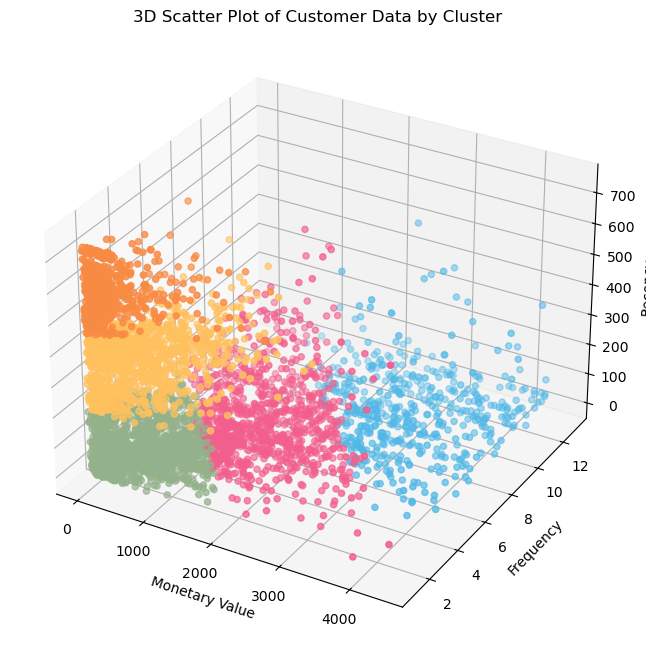

In [120]:
cluster_colors = {0: '#f35f8d',  
                  1: '#f98b44',  
                  2: '#ffc15e',  
                  3: '#93b18a',
                  4: '#50b8e7'} 

colors = non_outlier_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outlier_df['Monetary'], 
                     non_outlier_df['Frequency'], 
                     non_outlier_df['Recency'], 
                     c=colors,  
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

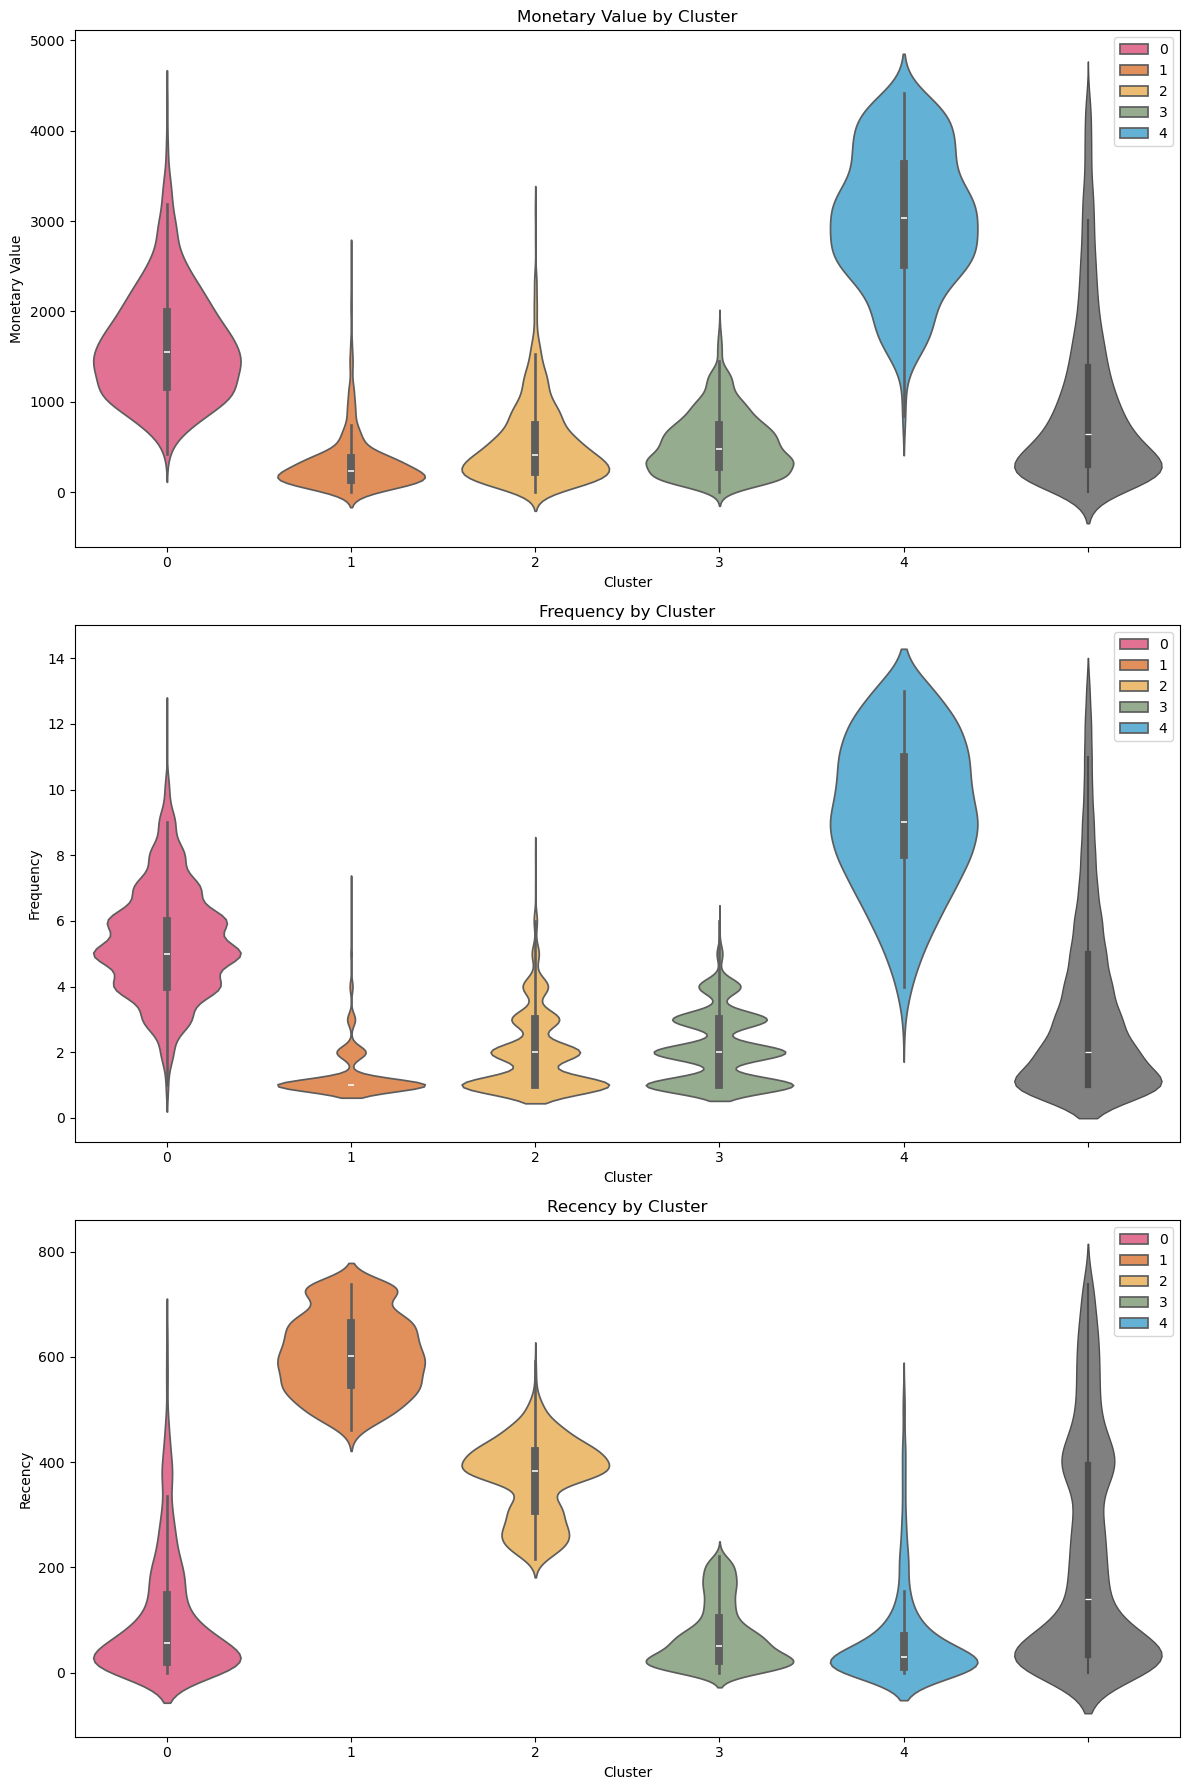

In [119]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Monetary'], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df['Monetary'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Frequency'], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Recency'], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

#### **Analysis of Non-Outlier Clusters**
From the 3D scatter and the violin plots, I will assign a name to each group based on their characteristics:\
The names for the groups are based on the list from TM: https://blog.tomorrowmarketers.org/phan-tich-rfm-la-gi/\
\
**Group 0: Potential Loyalist**
- Characteristics: medium spend, medium frequency, recent purchases
- Action: For Potential Loyalists, focus on nurturing them into Loyal Customers or Champions by offering personalized recommendations, targeted discounts, and exclusive perks to encourage repeat purchases and strengthen brand loyalty.

**Group 1: Lost**
- Characteristics: low total monetary values, low frequency, most purchaes are not recent (> 400 days)
- Action: Run a reactivation campaign with strong incentives (discounts, free shipping, exclusive deals). If ROI is low, consider reducing marketing spend on this group and focusing on higher-value segments.

**Group 2: At Risk**
- Characteristics: low to medium total monetary values, low to medium frequency, most purchases are from 200 or 400 days ago.
- Action: Win-back campaigns highlighting new products or improved offerings. Use personalized messaging reminding them of past purchases. Time-sensitive promotions could create urgency.

**Group 3: Promising**
- Characteristics: low to medium total monetary values, low to medium frequency, but recent purchases
- Action: Encourage repeat buying through follow-up emails, small-value loyalty points, and product recommendations. Goal is to convert them into Loyal Customers by increasing purchase frequency.

**Group 4:Loyal Customers**
- Characteristics: medium to high total monetary values, medium to high frequency, most purchases are recent
- Action: Maintain engagement through personalized offers, loyalty rewards, and VIP programs to strengthen retention. Introduce upselling/cross-selling to gradually increase monetary value.


### OUTLIER ANALYSIS

In [121]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
1,12347.0,4921.53,8,2011-12-07 15:52:00,1,-1
3,12349.0,4428.69,4,2011-11-21 09:51:00,18,-1
10,12356.0,6371.73,6,2011-11-17 08:40:00,22,-1
11,12357.0,18287.66,3,2011-11-06 16:07:00,32,-1
13,12359.0,6273.79,8,2011-10-13 12:47:00,57,-1
...,...,...,...,...,...,...
5659,18226.0,11094.69,24,2011-10-26 13:36:00,43,-3
5662,18229.0,10150.51,28,2011-11-28 09:48:00,11,-3
5664,18231.0,6213.46,24,2011-05-31 14:18:00,191,-3
5678,18245.0,6137.84,19,2011-12-02 14:48:00,6,-3


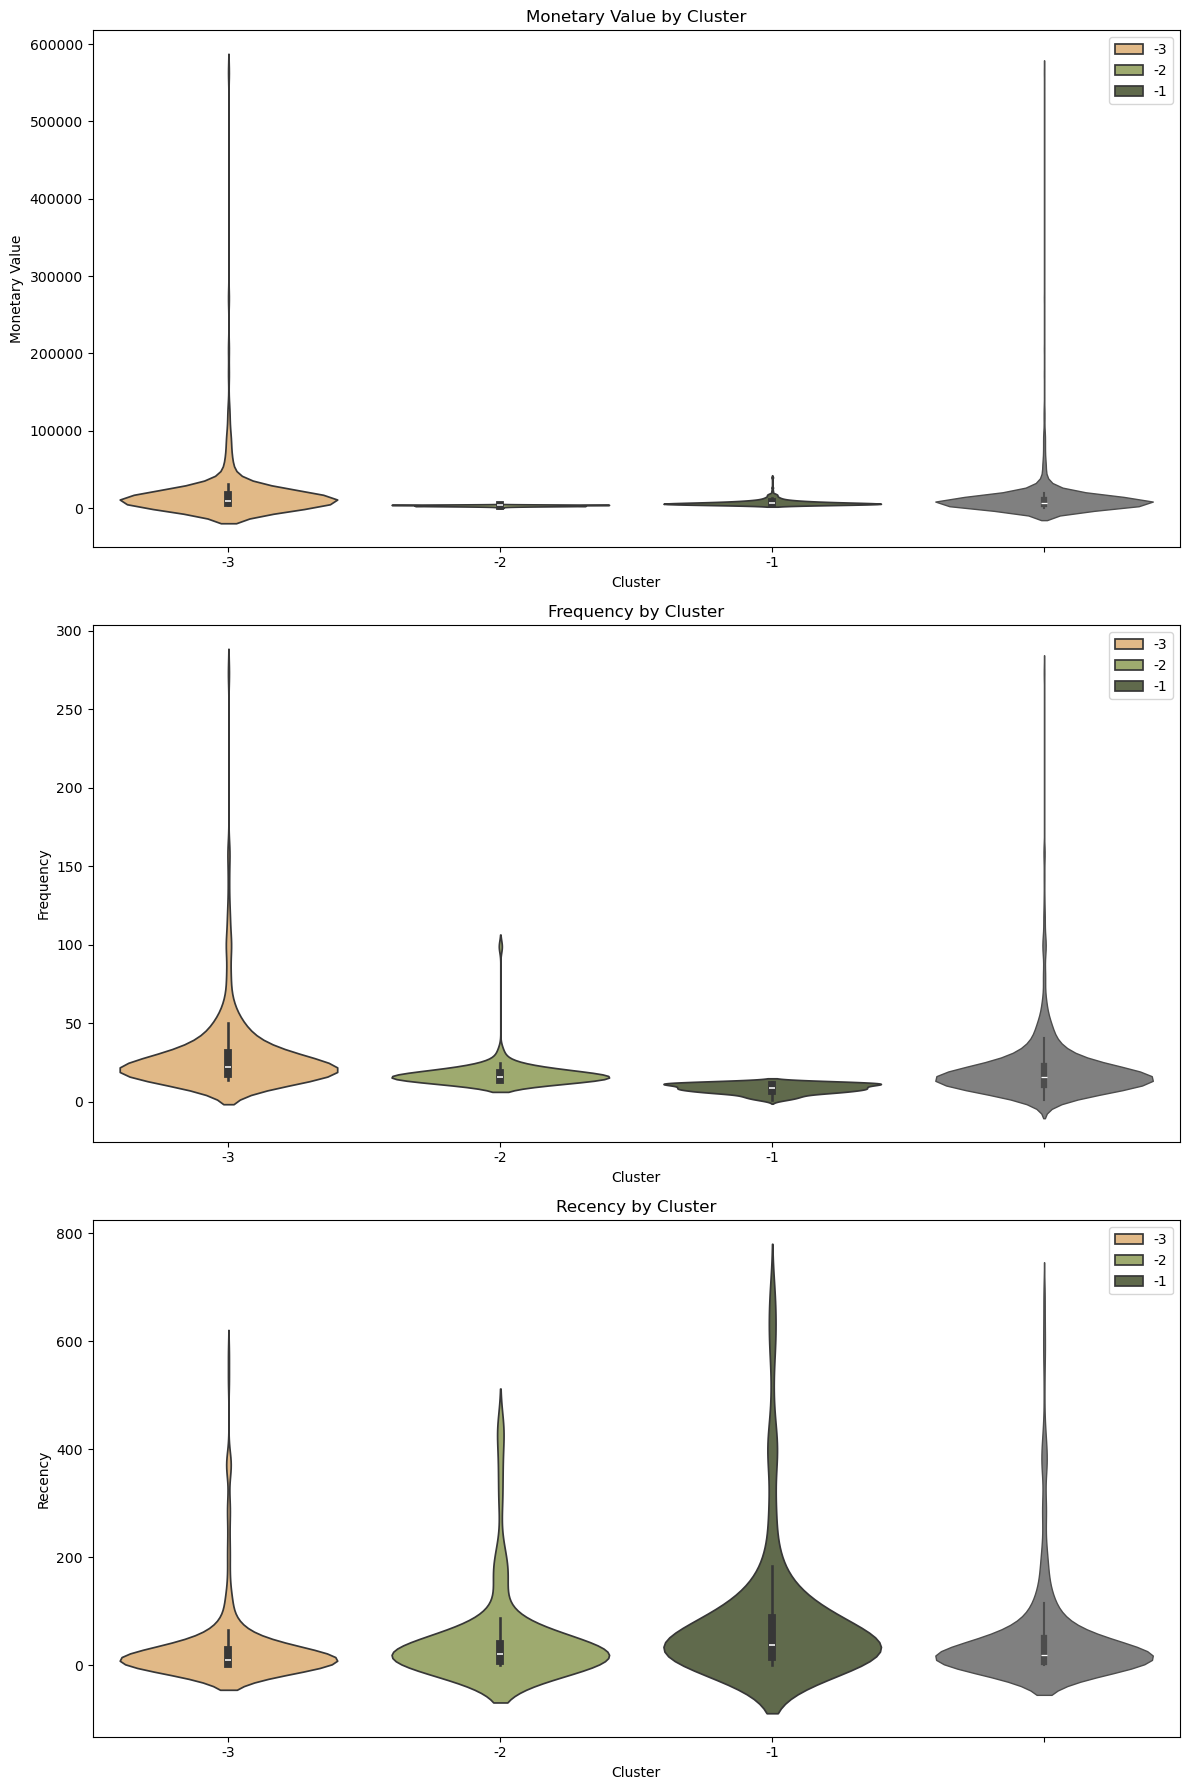

In [123]:
cluster_colors = {-1: "#626F47",
                  -2: '#A4B465',
                  -3: '#F0BB78'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Monetary'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Monetary'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

#### **Analysis of Outlier Clusters**
All clusters seem to be recent buyers.
\
\
**Group -1: Very Promising**
- Characteristics: high spenders but not frequent buyers
- Action: Encourage more frequent purchases through tailored product recommendations, time-limited offers, and loyalty incentives.

**Group -2: Very Loyal Customers**
- Characteristics: frequent buyers but spend not much per purchase
- Action: Increase average order value by bundling products, upselling, and offering free shipping thresholds.

**Group -3: Champion**
- Characteristics: frequent buyers and buy large amounts
- Action: Maintain their loyalty with VIP perks, early product access, and referral rewards to keep engagement high.

#### **Summary of cluster names**
- Group 0: Potential Loyalist
- Group 1: Lost
- Group 2: At Risk
- Group 3: Promising
- Group 4: Loyal Customers
- Group -1: Very Promising
- Group -2: Very Loyal Customers
- Group -3: Champion

In [125]:
full_cluster_labels = {
    0: "Potential Loyalist",
    1: "Lost",
    2: "At Risk",
    3: "Promising",
    4: "Loyal Customer",
    -1: "Very Promising",
    -2: "Very Loyal Customer",
    -3: "Champion"
}

full_df = pd.concat([non_outlier_df, outlier_clusters_df])

full_df["ClusterName"] = full_df["Cluster"].map(full_cluster_labels)
full_df

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster,ClusterName
0,12346.0,169.36,2,2010-06-28 13:53:00,528,1,Lost
2,12348.0,2019.40,5,2011-09-25 13:13:00,74,0,Potential Loyalist
4,12350.0,334.40,1,2011-02-02 16:01:00,309,2,At Risk
5,12351.0,300.93,1,2010-11-29 15:23:00,374,2,At Risk
6,12352.0,1584.53,6,2011-11-03 14:37:00,35,0,Potential Loyalist
...,...,...,...,...,...,...,...
5659,18226.0,11094.69,24,2011-10-26 13:36:00,43,-3,Champion
5662,18229.0,10150.51,28,2011-11-28 09:48:00,11,-3,Champion
5664,18231.0,6213.46,24,2011-05-31 14:18:00,191,-3,Champion
5678,18245.0,6137.84,19,2011-12-02 14:48:00,6,-3,Champion


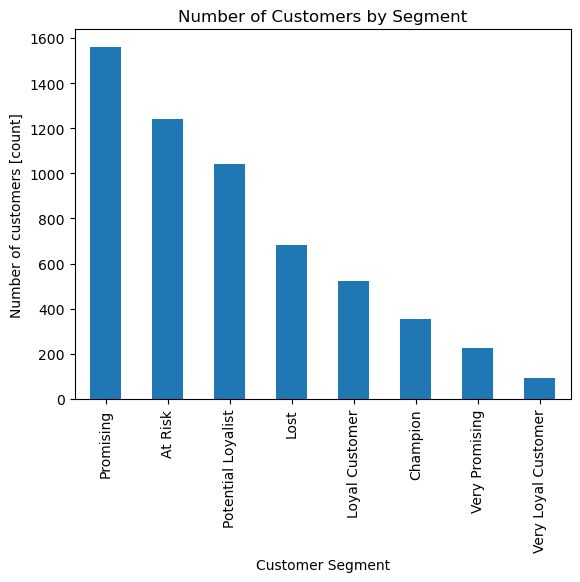

In [128]:
full_df["ClusterName"].value_counts().plot(kind="bar")
plt.xlabel("Customer Segment")
plt.ylabel("Number of customers [count]")
plt.title("Number of Customers by Segment");